## Loading the dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Loading the dataset

In [2]:
df = pd.read_csv('./TV_Sales.csv')
df

,TV,Sales
0,16.0,54.732757
1,13.0,46.677897
2,41.0,150.177829
3,83.0,298.246340
4,15.0,56.594181
...,...,...
4567,26.0,94.685866
4568,71.0,249.101915
4569,44.0,163.631457
4570,71.0,253.610411


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      4562 non-null   float64
 1   Sales   4566 non-null   float64
dtypes: float64(2)
memory usage: 71.6 KB


In [4]:
df.shape

(4572, 2)

In [5]:
df.isnull().mean()*100

TV       0.218723
Sales    0.131234
dtype: float64

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4567    False
4568    False
4569    False
4570    False
4571    False
Length: 4572, dtype: bool

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().mean()*100

TV       0.0
Sales    0.0
dtype: float64

## Selecting the features,here only one column

In [9]:
x=df[['TV']].values
x

array([[16.],
       [13.],
       [41.],
       ...,
       [44.],
       [71.],
       [42.]])

## Selecting the target column

In [10]:
y=df[['Sales']].values

In [11]:
sc=StandardScaler()

In [12]:
x=sc.fit_transform(x)
x

array([[-1.45775911],
       [-1.57263965],
       [-0.50042125],
       ...,
       [-0.38554071],
       [ 0.64838417],
       [-0.46212774]])

In [13]:
y

array([[ 54.73275715],
       [ 46.67789698],
       [150.1778288 ],
       ...,
       [163.6314574 ],
       [253.6104113 ],
       [148.2024141 ]])

## Seleting into training and testing data

In [14]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

## Model Building

In [15]:
model=LinearRegression()

## Fitting the model 

In [16]:
model.fit(x_train,y_train)

LinearRegression()

## Coefficient

In [17]:
model.coef_

array([[92.9890112]])

## Intercept

In [18]:
model.intercept_

array([192.43260955])

## Training accuracy

In [19]:
training_score=model.score(x_train,y_train)*100
training_score

99.89945329945171

## Testing Accuracy

In [20]:
testing_score=model.score(x_test,y_test)*100
testing_score

99.89974160292293

## R2_score

In [21]:
R2_score=r2_score(y_test,model.predict(x_test))*100
R2_score

99.89974160292293

## Mean Absolute Error

In [22]:
mae=mean_absolute_error(y_test,model.predict(x_test))
mae

2.3632431170394668

## Mean squared Error

In [23]:
mse=mean_squared_error(y_test,model.predict(x_test))
mse

8.610468010474193

## Predicting the value

In [24]:
y_pred=model.predict(x)
y_pred

array([[ 56.87703178],
       [ 46.19440377],
       [145.89893187],
       ...,
       [156.58155988],
       [252.72521198],
       [149.45980788]])

### Creating a dataframe with actual value predicted value  in order to compare them

In [25]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,54.732757,56.877032
1,46.677897,46.194404
2,150.177829,145.898932
3,298.246340,295.455724
4,56.594181,53.316156


In [26]:
OUTPUT.tail()

,ACTUAL,PREDICTED
4551,94.685866,92.485792
4552,249.101915,252.725212
4553,163.631457,156.581560
4554,253.610411,252.725212
4555,148.202414,149.459808


## Visulisng the output

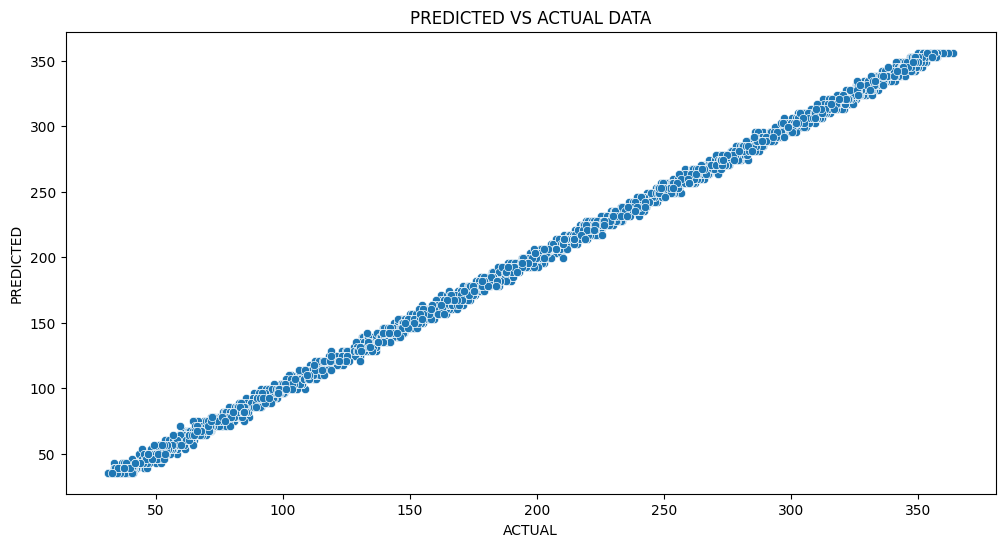

In [27]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
plt.xticks()
sns.scatterplot(data=OUTPUT,x ="ACTUAL",y ="PREDICTED");

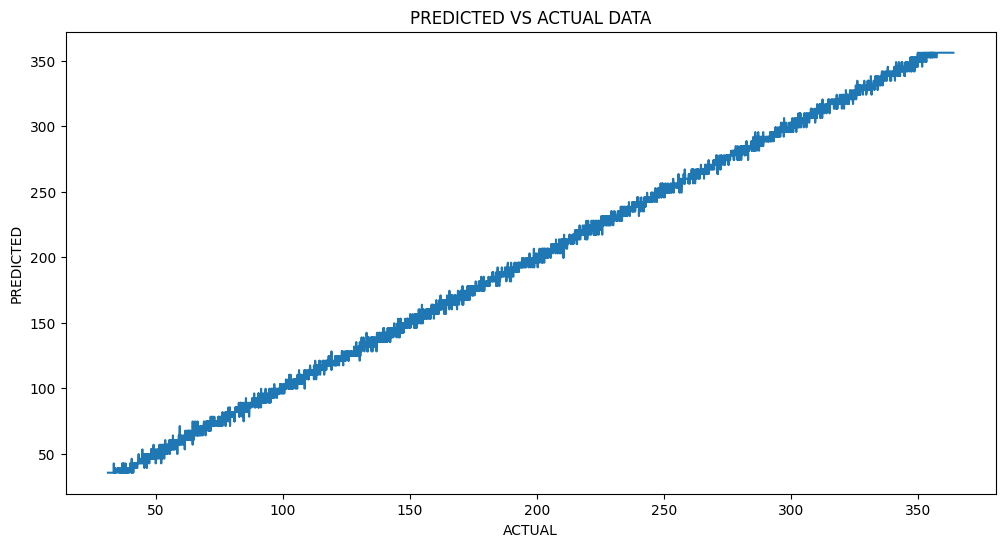

In [28]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
sns.lineplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");

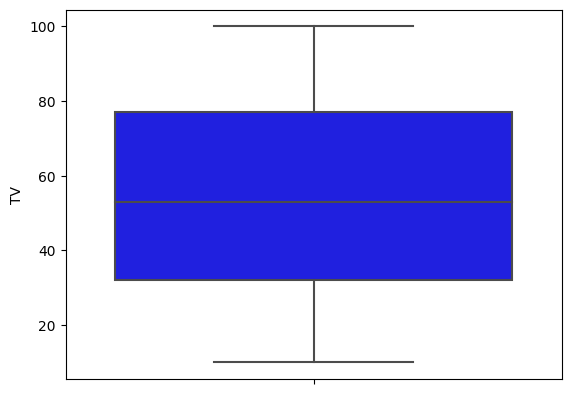

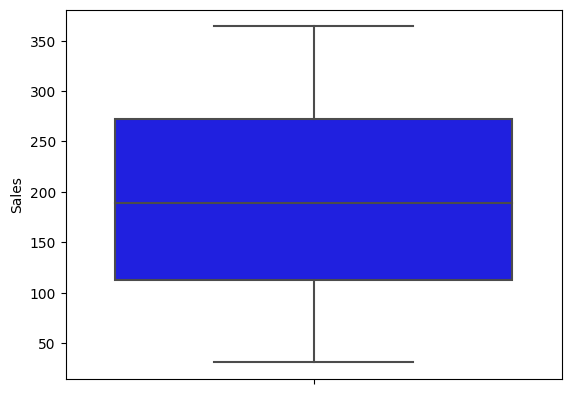

In [29]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(y=df[i],color="blue")
        plt.show();

In [32]:
hi_plot(data=df, annot=False);

NameError: name 'k' is not defined